 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csv = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_csv)
whale_df['Date'] = pd.to_datetime(whale_df["Date"], infer_datetime_format=True)
whale_df.set_index(whale_df['Date'], inplace=True)
whale_df.drop(columns=['Date'],inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# The last 5 items for the whale df
whale_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algo algorithmic returns
algo_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_csv)
algo_df['Date'] = pd.to_datetime(algo_df["Date"], infer_datetime_format=True)
algo_df.set_index(algo_df['Date'], inplace=True)
algo_df.drop(columns=['Date'],inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# The last 5 items for the algo df
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_csv)
sp500_df['Date'] = pd.to_datetime(sp500_df["Date"], infer_datetime_format=True)
sp500_df.set_index(sp500_df['Date'], inplace=True)
sp500_df.drop(columns=['Date'],inplace=True)
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df = sp500_df.sort_values("Date", ascending=True)
sp500_df.head()

C:\Users\ray_k\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# The last 5 items for the sp_500 df
sp500_df.tail()

,Close
Date,
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03
2019-04-22,2907.97
2019-04-23,2933.68


In [12]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df['Close'].dtypes

dtype('float64')

In [14]:
# Calculate Daily Returns
sp500_df.isnull().sum()
sp500_daily_returns_df = sp500_df.pct_change()
sp500_daily_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
# Drop nulls
sp500_daily_returns_df.pct_change()
sp500_daily_returns_df.dropna(inplace=True)
sp500_daily_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns_df = sp500_daily_returns_df.rename(columns={"Close":"S&P500"})
sp500_daily_returns_df.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_daily_returns_df], axis="columns", join="inner")
combined_df.dropna(inplace = True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

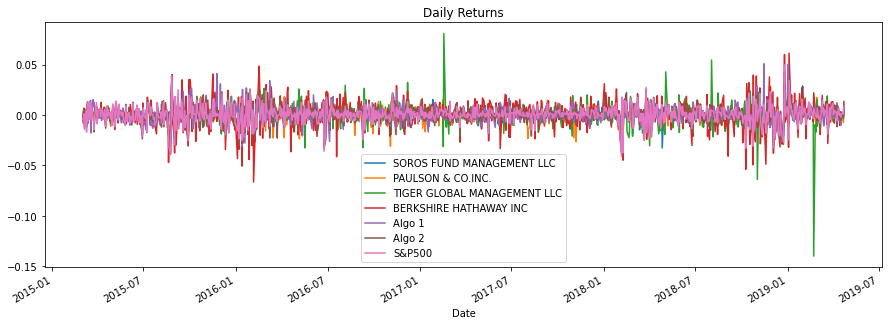

In [18]:
# Plot daily returns of all portfolios
combined_df.plot(title="Daily Returns", figsize = (15,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

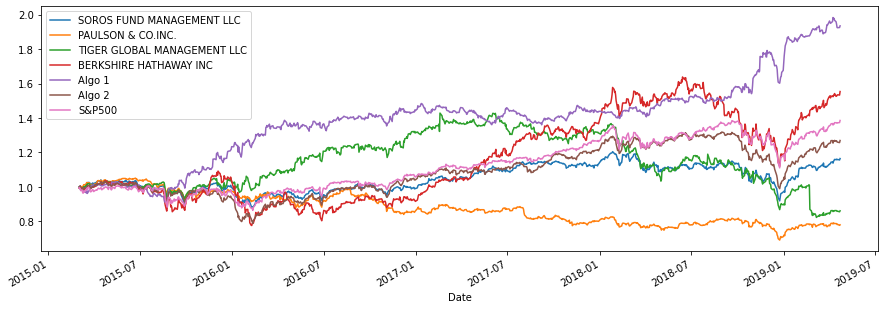

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize = (15,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

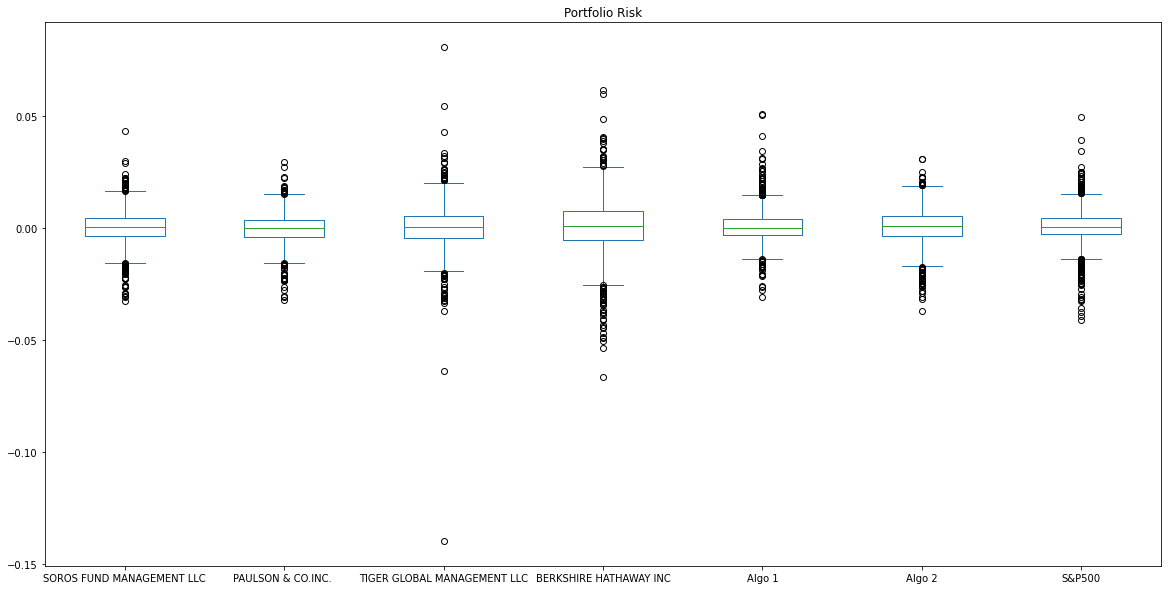

In [20]:
# Box plot to visually show risk
combined_df.plot(kind="box", title="Portfolio Risk", figsize = (20,10), vert=True)

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = pd.DataFrame(combined_df.std().sort_values(ascending=False)).rename(columns = {0:"Standard Deviation"})
combined_df_std

,Standard Deviation
BERKSHIRE HATHAWAY INC,0.012919
TIGER GLOBAL MANAGEMENT LLC,0.010894
S&P500,0.008554
Algo 2,0.008342
SOROS FUND MANAGEMENT LLC,0.007895
Algo 1,0.007620
PAULSON & CO.INC.,0.007023


### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate the daily standard deviation of S&P 500
higher_risk_than_SP500_std = combined_df_std[combined_df_std["Standard Deviation"] > combined_df_std.loc["S&P500", "Standard Deviation"]]
higher_risk_than_SP500_std

,Standard Deviation
BERKSHIRE HATHAWAY INC,0.012919
TIGER GLOBAL MANAGEMENT LLC,0.010894


### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df_std * np.sqrt(252)
annualized_std

,Standard Deviation
BERKSHIRE HATHAWAY INC,0.205077
TIGER GLOBAL MANAGEMENT LLC,0.172936
S&P500,0.135786
Algo 2,0.132430
SOROS FUND MANAGEMENT LLC,0.125335
Algo 1,0.120967
PAULSON & CO.INC.,0.111488


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

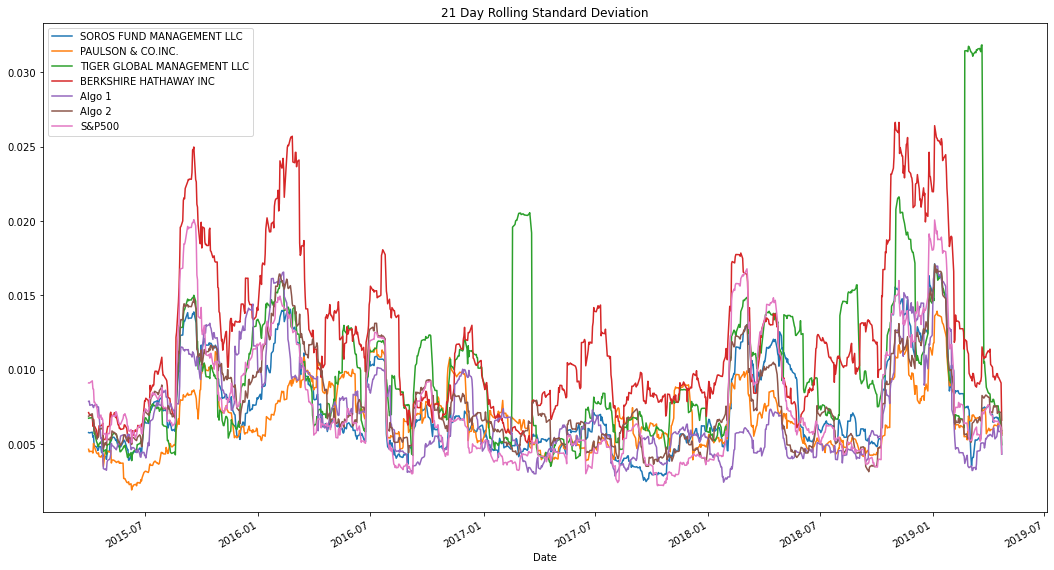

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(18,10))

### Calculate and plot the correlation

<AxesSubplot:xlabel='S&P500', ylabel='SOROS FUND MANAGEMENT LLC'>

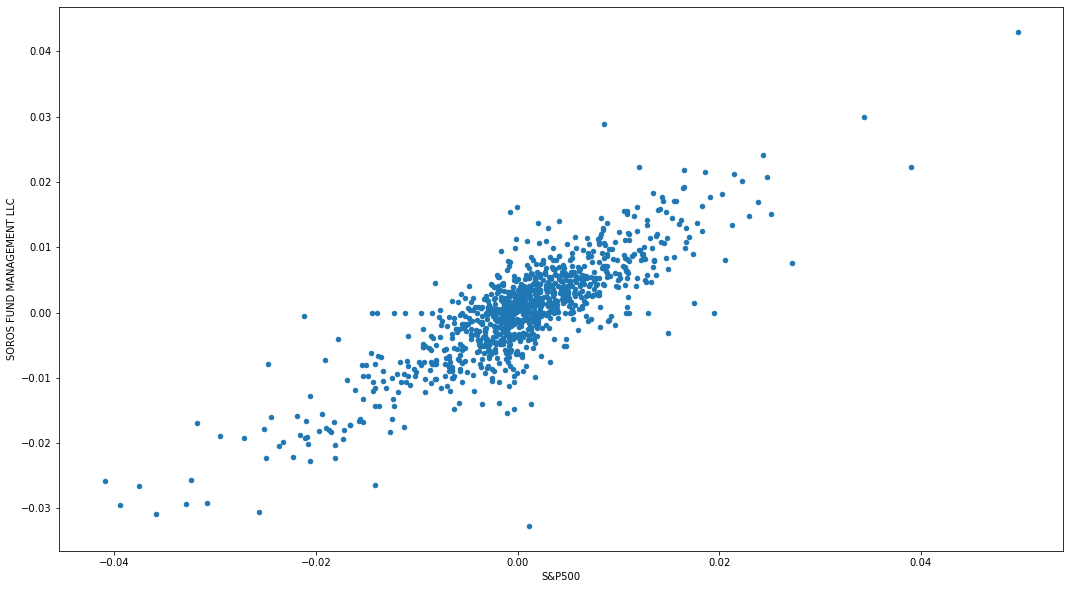

In [25]:
# Calculate the correlation
corr_sp500 = pd.DataFrame(combined_df.corr()).loc[:,"S&P500"]
corr_sp500[corr_sp500 == corr_sp500[corr_sp500<1].max()]
# Plot the correlation matrix
combined_df.plot(kind="scatter", y = "SOROS FUND MANAGEMENT LLC", x = "S&P500", figsize = (18,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta TIGER GLOBAL MANAGEMENT LLC'}, xlabel='Date'>

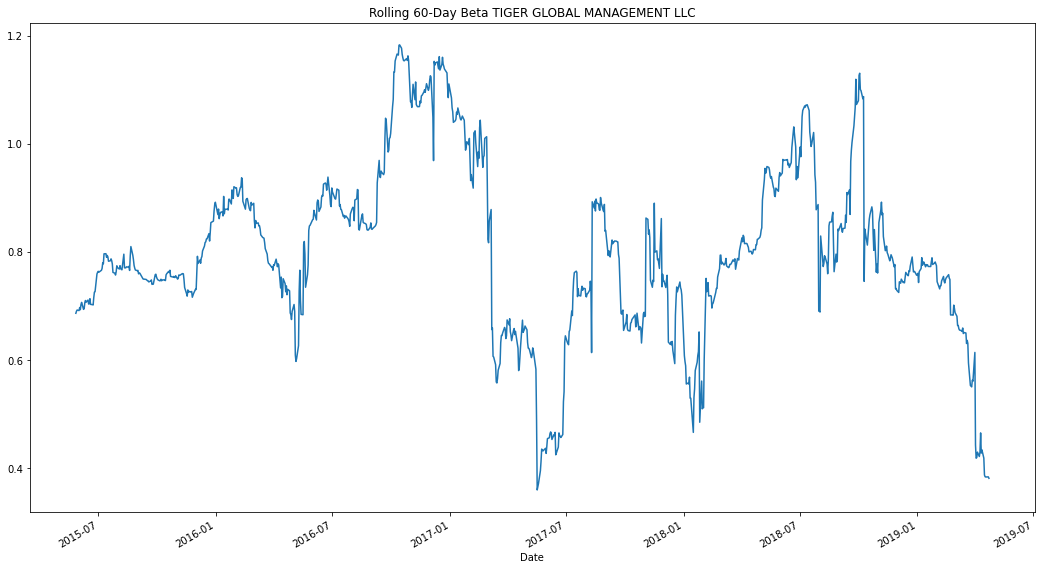

In [26]:
# Calculate covariance of a single portfolio and plot the 60-day rolling beta between it and the S&P 500
TIGER_rolling_covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P500'])
# Calculate variance of S&P 500
rolling_variance = combined_df['S&P500'].rolling(window=60).var()
# Computing beta
TIGER_rolling_beta = TIGER_rolling_covariance / rolling_variance
# Plot beta trend
TIGER_rolling_beta.plot(figsize=(18, 10), title='Rolling 60-Day Beta TIGER GLOBAL MANAGEMENT LLC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

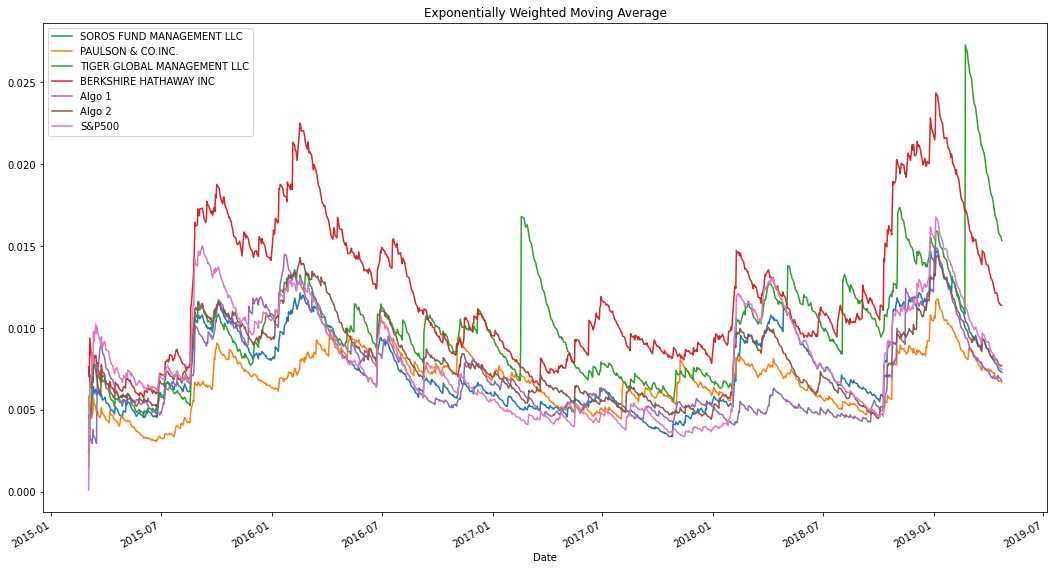

In [28]:
# Use `ewm` to calculate the rolling window
combined_df_ewm = combined_df.ewm(halflife = 21,adjust = True).std().plot(title = "Exponentially Weighted Moving Average", figsize = (18,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_df.mean()*252/(combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

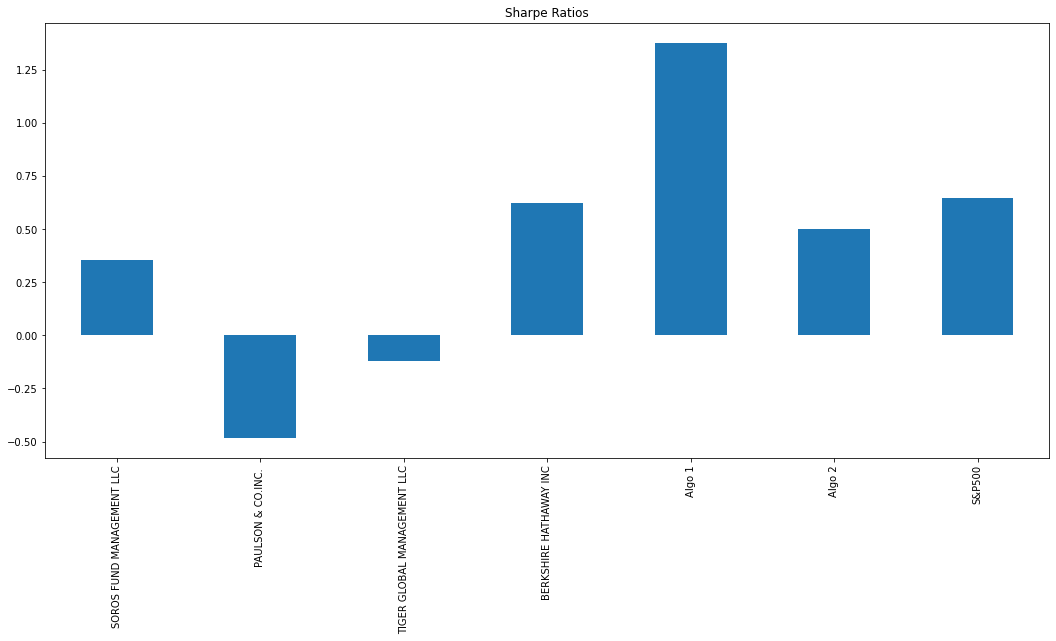

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios",figsize = (18,8))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 outperformed the S&P 500. Algo 2 underperformed the S&P 500 and Berkshire Hathaway INC. Algo 1 and Algo 2 outperformed Soros Fund Management LLC, Paulson & Co INC., and Tiger Global Management LLC

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Read the first stock - Walmart
WMT_history_csv = Path("Resources/WMT2.csv")
WMT_history_df = pd.read_csv(WMT_history_csv)
WMT_history_df['Date'] = pd.to_datetime(WMT_history_df["Date"], infer_datetime_format=True)
WMT_history_df.set_index(WMT_history_df['Date'], inplace=True)
WMT_history_df.drop(columns=['Date'],inplace=True)
WMT_history_df = WMT_history_df.sort_values("Date", ascending=True)
WMT_history_df.head()

,Close
Date,
2012-10-01,74.05
2012-10-02,73.75
2012-10-03,74.20
2012-10-04,74.72
2012-10-05,75.13


In [32]:
# Data Types
WMT_history_df.dtypes

Close    float64
dtype: object

In [33]:
# Fix Data Types
WMT_history_df['Close'] = WMT_history_df['Close'].astype('float')
WMT_history_df['Close'].dtypes

dtype('float64')

In [34]:
# Read the second stock - Amazon
AMZN_history_csv = Path("Resources/AMZN2.csv")
AMZN_history_df = pd.read_csv(AMZN_history_csv)
AMZN_history_df['Date'] = pd.to_datetime(AMZN_history_df["Date"], infer_datetime_format=True)
AMZN_history_df.set_index(AMZN_history_df['Date'], inplace=True)
AMZN_history_df.drop(columns=['Date'],inplace=True)
AMZN_history_df = AMZN_history_df.sort_values("Date", ascending=True)
AMZN_history_df.head()

,Close
Date,
2012-10-01,12.60
2012-10-02,12.53
2012-10-03,12.80
2012-10-04,13.02
2012-10-05,12.93


In [35]:
# Data Types
AMZN_history_df.dtypes

Close    float64
dtype: object

In [36]:
# Fix Data Types
AMZN_history_df['Close'] = AMZN_history_df['Close'].astype('float')
AMZN_history_df['Close'].dtypes

dtype('float64')

In [37]:
# Read the third stock - Microsoft
MSFT_history_csv = Path("Resources/MSFT2.csv")
MSFT_history_df = pd.read_csv(MSFT_history_csv)
MSFT_history_df['Date'] = pd.to_datetime(MSFT_history_df["Date"], infer_datetime_format=True)
MSFT_history_df.set_index(MSFT_history_df['Date'], inplace=True)
MSFT_history_df.drop(columns=['Date'],inplace=True)
MSFT_history_df = MSFT_history_df.sort_values("Date", ascending=True)
MSFT_history_df.head()

,Close
Date,
2012-10-01,29.49
2012-10-02,29.66
2012-10-03,29.86
2012-10-04,30.03
2012-10-05,29.85


In [38]:
# Data Types
MSFT_history_df.dtypes

Close    float64
dtype: object

In [39]:
# Fix Data Types
MSFT_history_df['Close'] = MSFT_history_df['Close'].astype('float')
MSFT_history_df['Close'].dtypes

dtype('float64')

In [40]:
# Read the forth stock - Apple
AAPL_history_csv = Path("Resources/aapl_historical.csv")
AAPL_history_df = pd.read_csv(AAPL_history_csv)
AAPL_history_df['Date'] = pd.to_datetime(AAPL_history_df["Date"], infer_datetime_format=True)
AAPL_history_df.set_index(AAPL_history_df['Date'], inplace=True)
AAPL_history_df.drop(columns=['Date'],inplace=True)
AAPL_history_df = AAPL_history_df.sort_values("Date", ascending=True)
AAPL_history_df.head()

,Close
Date,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [41]:
# Data Types
AAPL_history_df.dtypes

Close    float64
dtype: object

In [42]:
# Fix Data Types
AAPL_history_df['Close'] = AAPL_history_df['Close'].astype('float')
AAPL_history_df['Close'].dtypes

dtype('float64')

In [43]:
# Read the fifth stock - Costco
COST_history_csv = Path("Resources/cost_historical.csv")
COST_history_df = pd.read_csv(COST_history_csv)
COST_history_df['Date'] = pd.to_datetime(COST_history_df["Date"], infer_datetime_format=True)
COST_history_df.set_index(COST_history_df['Date'], inplace=True)
COST_history_df.drop(columns=['Date'],inplace=True)
COST_history_df = COST_history_df.sort_values("Date", ascending=True)
COST_history_df.head()

,Close
Date,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [44]:
# Data Types
COST_history_df.dtypes

Close    float64
dtype: object

In [45]:
# Fix Data Types
COST_history_df['Close'] = COST_history_df['Close'].astype('float')
COST_history_df['Close'].dtypes

dtype('float64')

In [46]:
# Concatenate Walmart, Amazon and Microsoft stocks into a single DataFrame
combined_portfolio_df = pd.concat([WMT_history_df, AMZN_history_df, MSFT_history_df, AAPL_history_df, COST_history_df], axis="columns", join="inner")
# Sort datetime index
combined_portfolio_df.sort_index(inplace=True)
# Set column names
combined_portfolio_df.columns = ['WMT', 'AMZN', 'MSFT', 'AAPL', 'COST']
combined_portfolio_df.head()

,WMT,AMZN,MSFT,AAPL,COST
Date,,,,,
2018-05-11,83.38,80.15,97.70,188.59,195.76
2018-05-14,84.39,80.08,98.03,188.15,195.88
2018-05-15,84.52,78.81,97.32,186.44,195.48
2018-05-16,86.13,79.36,97.15,188.18,198.71
2018-05-17,84.49,79.09,96.18,186.99,199.60


In [47]:
# Data Types
combined_portfolio_df.dtypes

WMT     float64
AMZN    float64
MSFT    float64
AAPL    float64
COST    float64
dtype: object

In [48]:
# Drop Nulls
combined_portfolio_df.dropna()
combined_portfolio_returns = combined_portfolio_df.pct_change()
combined_portfolio_returns.dropna(inplace=True)
combined_portfolio_returns.head()

,WMT,AMZN,MSFT,AAPL,COST
Date,,,,,
2018-05-14,0.012113,-0.000873,0.003378,-0.002333,0.000613
2018-05-15,0.001540,-0.015859,-0.007243,-0.009088,-0.002042
2018-05-16,0.019049,0.006979,-0.001747,0.009333,0.016523
2018-05-17,-0.019041,-0.003402,-0.009985,-0.006324,0.004479
2018-05-18,-0.010060,-0.004678,0.001871,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [49]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
weighted_returns = combined_portfolio_returns.dot(weights)
weighted_returns = weighted_returns.rename("My Portfolio")
weighted_returns.dropna()
weighted_returns

Date
2018-05-14    0.002579
2018-05-15   -0.006538
2018-05-16    0.010027
2018-05-17   -0.006855
2018-05-18   -0.003942
                ...   
2019-04-15    0.006057
2019-04-16    0.001703
2019-04-17    0.006370
2019-04-18    0.003246
2019-04-22    0.000547
Name: My Portfolio, Length: 236, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((weighted_returns, combined_df), axis="columns", join="inner")
portfolio_returns.rename(columns={0:"My Portfolio"}, inplace = True)
portfolio_returns.dropna(inplace=True)
portfolio_returns.sort_index()
portfolio_returns.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,
2018-05-14,0.002579,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.006538,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.010027,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.006855,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.003942,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [51]:
# Calculate the annualized `std`
portfolio_annual_std = portfolio_returns*np.sqrt(252)
portfolio_annual_std.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,
2018-05-14,0.040948,0.000000,0.000000,0.000000,0.000000,0.014523,0.025952,0.014025
2018-05-15,-0.103794,-0.011523,-0.022364,-0.050632,-0.231862,-0.018014,-0.018078,-0.108616
2018-05-16,0.159180,0.137112,0.099126,0.086985,0.068418,-0.036931,0.053034,0.064459
2018-05-17,-0.108812,-0.031042,0.040065,-0.099488,-0.081591,-0.110316,0.082625,-0.013586
2018-05-18,-0.062577,-0.069171,-0.042424,-0.203700,-0.035113,0.040597,-0.039629,-0.041785


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standart Deviation'}, xlabel='Date'>

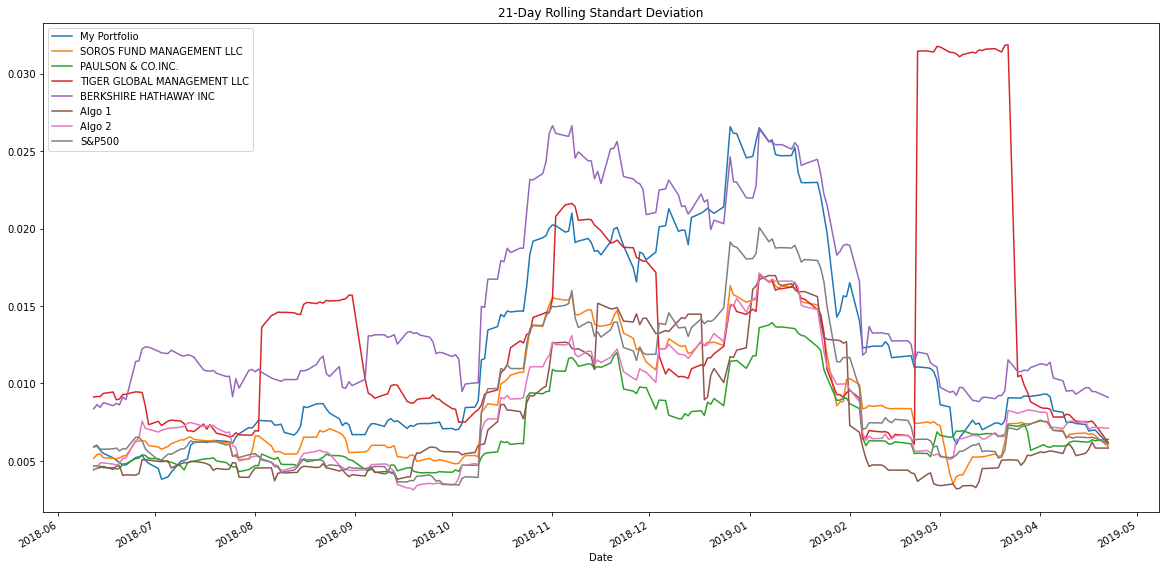

In [52]:
# Calculate and plot rolling std with 21-day window
portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title='21-Day Rolling Standart Deviation')

### Calculate and plot the correlation

My Portfolio                   1.000000
SOROS FUND MANAGEMENT LLC      0.769585
PAULSON & CO.INC.              0.664064
TIGER GLOBAL MANAGEMENT LLC    0.413879
BERKSHIRE HATHAWAY INC         0.801290
Algo 1                         0.274219
Algo 2                         0.781350
S&P500                         0.902351
Name: My Portfolio, dtype: float64

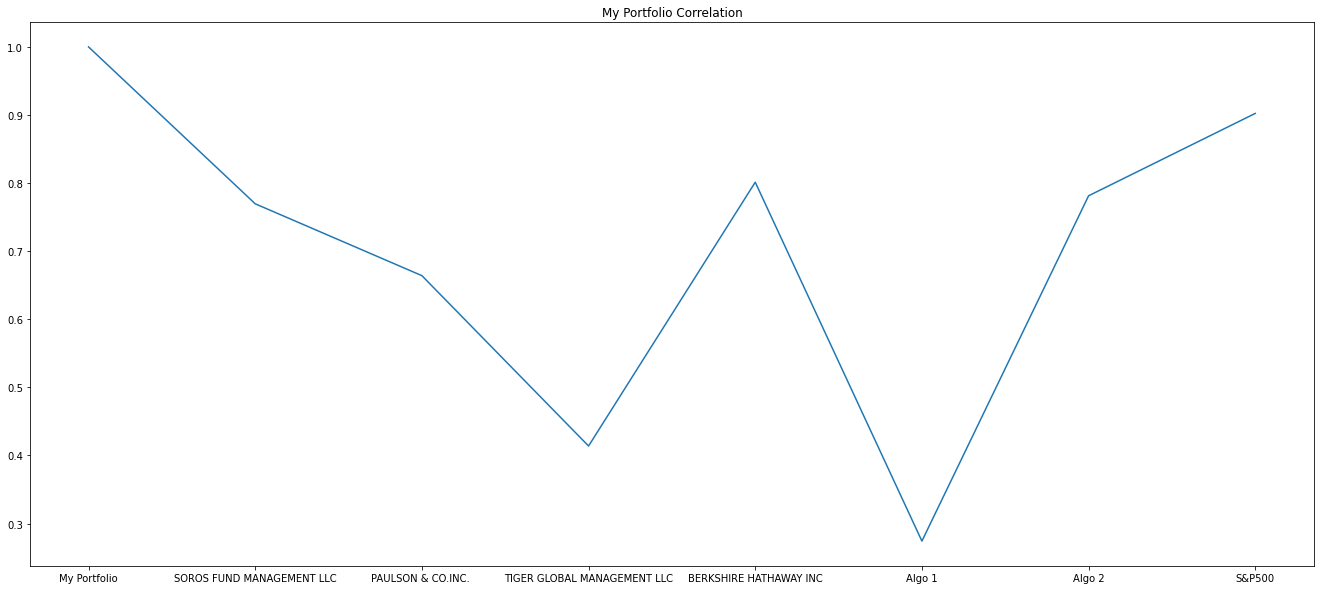

In [53]:
# Calculate and plot the correlation
correlation_my_portfolio = portfolio_returns.corr().loc[:,"My Portfolio"]
correlation_my_portfolio[correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]
correlation_my_portfolio.plot(figsize = (23,10), title="My Portfolio Correlation")
correlation_my_portfolio

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'My Portfolio - Rolling 60-Day Beta'}, xlabel='Date'>

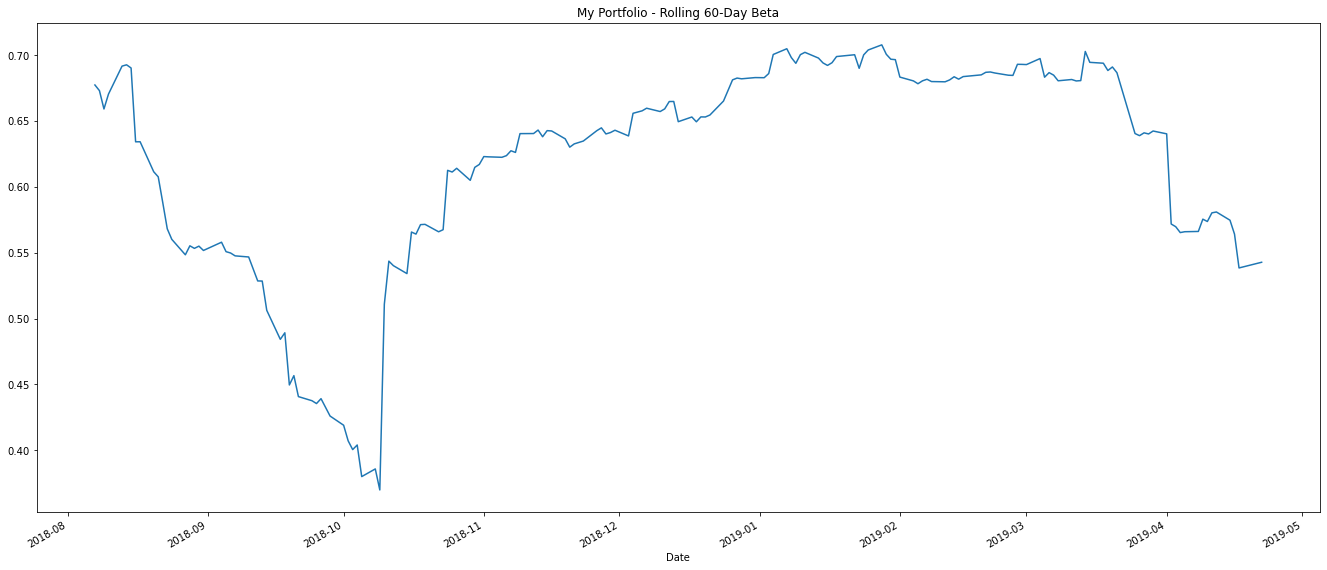

In [54]:
# Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500
rolling_covariance = portfolio_returns['My Portfolio'].rolling(window=60).cov(portfolio_returns['S&P500'])
rolling_variance = portfolio_returns['My Portfolio'].rolling(window=60).var()
rolling_beta = rolling_covariance/rolling_variance
rolling_beta.plot(figsize=(23, 10), title='My Portfolio - Rolling 60-Day Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [55]:
# Calculate Annualzied Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))
sharpe_ratios

My Portfolio                   1.066901
SOROS FUND MANAGEMENT LLC      0.367745
PAULSON & CO.INC.              0.220234
TIGER GLOBAL MANAGEMENT LLC   -1.032218
BERKSHIRE HATHAWAY INC         0.099682
Algo 1                         1.936686
Algo 2                         0.007097
S&P500                         0.508035
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

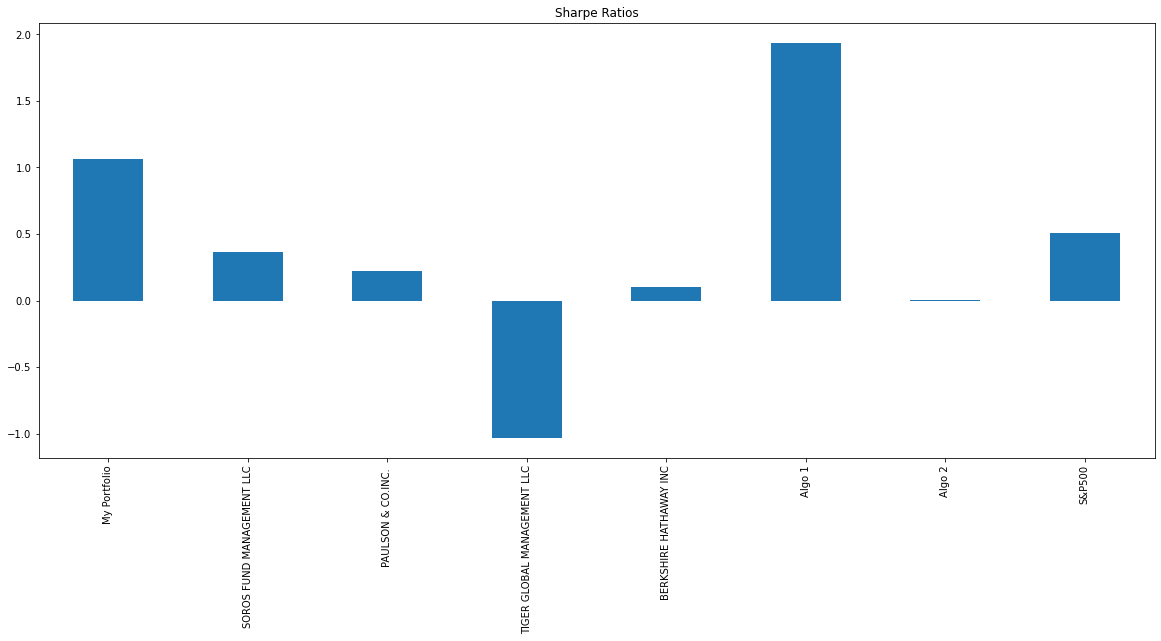

In [56]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',title="Sharpe Ratios", figsize=(20, 8))

### How does your portfolio do?

Write your answer here!

My Portfolio outperformed all other portfolios, except Algo 1.